# The Inspection Paradox is Everywhere

Allen Downey 2019

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from empiricaldist import Pmf

from utils import decorate

In [2]:
# set the random seed so we get the same results every time
np.random.seed(17)

In [3]:
# make the directory for the figures
!mkdir inspection

mkdir: cannot create directory ‘inspection’: File exists


## Class size

Here's the data summarizing the distribution of undergraduate class sizes at Purdue University in 2013-14.

In [4]:
# Class size data originally from
# https://www.purdue.edu/datadigest/2013-14/InstrStuLIfe/DistUGClasses.html
# now available from
# https://web.archive.org/web/20160415011613/https://www.purdue.edu/datadigest/2013-14/InstrStuLIfe/DistUGClasses.html

sizes = [(1, 1), 
         (2, 9),
         (10, 19),
         (20, 29),
         (30, 39),
         (40, 49),
         (50, 99),
         (100, 300)]
         
counts = [138, 635, 1788, 1979, 796, 354, 487, 333]

I generate a sample from this distribution, assuming a uniform distribution in each range and an upper bound of 300.

In [5]:
def generate_sample(sizes, counts):
    """Generate a sample from a distribution.
    
    sizes: sequence of (low, high) pairs
    counts: sequence of integers
    
    returns: NumPy array
    """
    t = []
    for (low, high), count in zip(sizes, counts):
        print(count, low, high)
        sample = np.random.randint(low, high+1, count)
        t.extend(sample)
    return np.array(t)

The "unbiased" sample is as seen by the college, with each class equally likely to be in the sample.

In [6]:
unbiased = generate_sample(sizes, counts)

138 1 1
635 2 9
1788 10 19
1979 20 29
796 30 39
354 40 49
487 50 99
333 100 300


To generate a biased sample, we use the values themselves as weights and resample with replacement.

In [7]:
def resample_weighted(sample, weights):
    """Resample values from `sample` with the given weights. 
    
    sample: NumPy array
    weights: NumPy array
    
    returns: NumPy array
    """
    n = len(sample)
    p = weights / np.sum(weights)
    return np.random.choice(sample, n, p=p)

In [8]:
biased = resample_weighted(unbiased, unbiased)

To plot the distribution, I use KDE to estimate the density function, then evaluate it over the given sequence of `xs`.

In [9]:
from scipy.stats import gaussian_kde

def kdeplot(sample, xs, label=None, **options):
    """Use KDE to plot the density function.
    
    sample: NumPy array
    xs: NumPy array
    label: string
    """
    density = gaussian_kde(sample, **options).evaluate(xs)
    plt.plot(xs, density, label=label)
    decorate(ylabel='Relative likelihood')

The following plot shows the distribution of class size as seen by the Dean, and as seen by a sample of students.

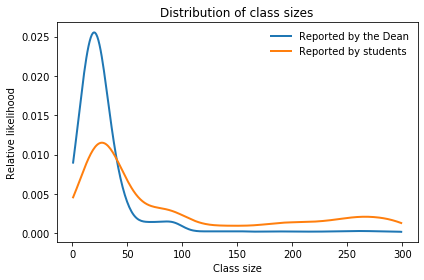

In [10]:
xs = np.arange(1, 300)
kdeplot(unbiased, xs, 'Reported by the Dean')
kdeplot(biased, xs, 'Reported by students')

decorate(xlabel='Class size',
         title='Distribution of class sizes')

plt.savefig('inspection/class_size.png', dpi=150)

Here are the means of the unbiased and biased distributions.

In [11]:
np.mean(unbiased)

34.611827956989245

In [12]:
np.mean(biased)

92.59815668202765

## Red Line

Here are times between trains in seconds.

In [13]:
unbiased = [
    428.0, 705.0, 407.0, 465.0, 433.0, 425.0, 204.0, 506.0, 143.0, 351.0, 
    450.0, 598.0, 464.0, 749.0, 341.0, 586.0, 754.0, 256.0, 378.0, 435.0, 
    176.0, 405.0, 360.0, 519.0, 648.0, 374.0, 483.0, 537.0, 578.0, 534.0, 
    577.0, 619.0, 538.0, 331.0, 186.0, 629.0, 193.0, 360.0, 660.0, 484.0, 
    512.0, 315.0, 457.0, 404.0, 740.0, 388.0, 357.0, 485.0, 567.0, 160.0, 
    428.0, 387.0, 901.0, 187.0, 622.0, 616.0, 585.0, 474.0, 442.0, 499.0, 
    437.0, 620.0, 351.0, 286.0, 373.0, 232.0, 393.0, 745.0, 636.0, 758.0,
]

Here's the same data in minutes.

In [14]:
unbiased = np.array(unbiased) / 60

We can use the same function to generate a biased sample.

In [15]:
biased = resample_weighted(unbiased, unbiased)

And plot the results.

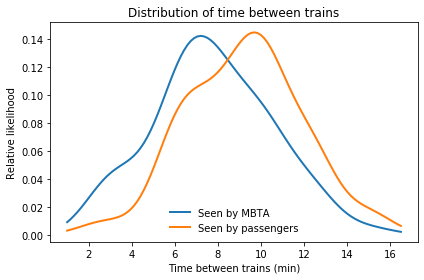

In [16]:
xs = np.linspace(1, 16.5, 101)
kdeplot(unbiased, xs, 'Seen by MBTA')
kdeplot(biased, xs, 'Seen by passengers')

decorate(xlabel='Time between trains (min)',
         title='Distribution of time between trains')

plt.savefig('inspection/red_line.png', dpi=150)

Here are the means of the distributions and the percentage difference.

In [17]:
np.mean(biased), np.mean(unbiased)

(9.207857142857144, 7.7680952380952375)

In [18]:
(np.mean(biased) - np.mean(unbiased)) /  np.mean(unbiased) * 100

18.53429779930119

## Social network

The following function reads the Facebook data.

In [19]:
import networkx as nx

def read_graph(filename):
    """Read a graph from a file.
    
    filename: string
    
    return: nx.Graph
    """
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

In [20]:
# https://snap.stanford.edu/data/facebook_combined.txt.gz

fb = read_graph('facebook_combined.txt.gz')
n = len(fb)
m = len(fb.edges())
n, m

(4039, 88234)

The unbiased sample is the number of friends for each user.

In [21]:
unbiased = [fb.degree(node) for node in fb]
len(unbiased)

4039

In [22]:
np.max(unbiased)

1045

We can use the same function to generate a biased sample.

In [23]:
biased = resample_weighted(unbiased, unbiased)

And generate the plot.

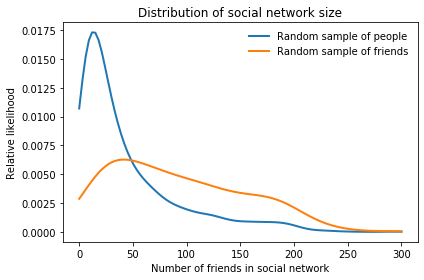

In [24]:
xs = np.linspace(0, 300, 101)
kdeplot(unbiased, xs, 'Random sample of people')
kdeplot(biased, xs, 'Random sample of friends')

decorate(xlabel='Number of friends in social network',
         title='Distribution of social network size')

plt.savefig('inspection/social.png', dpi=150)

Here are the means of the distributions.

In [25]:
np.mean(biased), np.mean(unbiased)

(103.75563258232236, 43.69101262688784)

And the probability that the friend of a user has more friends than the user.

In [26]:
np.mean(biased > unbiased)

0.759593958900718

## Relay race

The following function read the data from the 2010 James Joyce Ramble 10K, where I ran my personal record time.

In [27]:
import relay
results = relay.ReadResults()
unbiased = relay.GetSpeeds(results)

In this case, the weights are related to the difference between each element of the sample and the hypothetical speed of the observer.

In [28]:
weights = np.abs(np.array(unbiased) - 7)
biased = resample_weighted(unbiased, weights)

And here's the plot.

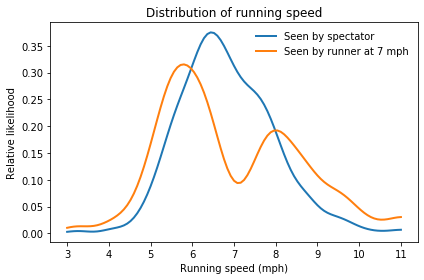

In [29]:
xs = np.linspace(3, 11, 101)
kdeplot(unbiased, xs, 'Seen by spectator')
kdeplot(biased, xs, 'Seen by runner at 7 mph', bw_method=0.2)

decorate(xlabel='Running speed (mph)',
         title='Distribution of running speed')

plt.savefig('inspection/relay.png', dpi=150)

## Prison sentences

First we read the [data from the Bureau of Prisons web page](https://www.bop.gov/about/statistics/statistics_inmate_sentences.jsp).

In [30]:
tables = pd.read_html('BOP Statistics_ Sentences Imposed.html')
df = tables[0]
df

,Sentence,# of Inmates,% of Inmates
0,0 to 1 year*,5155,2.3 %
1,> 1 year to < 3 years**,18619,11.3%
2,3 years to < 5 years,17897,10.9%
3,5 years to < 10 years,41887,25.4%
4,10 years to < 15 years,34995,21.3%
5,15 years to < 20 years,18674,11.3%
6,20 years or more but < Life,22738,13.8%
7,Life,4600,2.8%


Here are the low and I sentences for each range.  I assume that the minimum sentence is about a week, that sentences "less than life" are 40 years, and that a life sentence is between 40 and 60 years.

In [31]:
sentences = [(0.02, 1),
             (1, 3),
             (3, 5),
             (5, 10),
             (10, 15),
             (15, 20),
             (20, 40),
             (40, 60)]

We can get the counts from the table.

In [32]:
counts = df['# of Inmates']

Here's a different version of `generate_sample` for a continuous quantity.

In [33]:
def generate_sample(sizes, counts):
    """Generate a sample from a distribution.
    
    sizes: sequence of (low, high) pairs
    counts: sequence of integers
    
    returns: NumPy array
    """
    t = []
    for (low, high), count in zip(sizes, counts):
        print(count, low, high)
        sample = np.random.uniform(low, high, count)
        t.extend(sample)
    return np.array(t)

In this case, the data are biased.

In [34]:
biased = generate_sample(sentences, counts)

5155 0.02 1
18619 1 3
17897 3 5
41887 5 10
34995 10 15
18674 15 20
22738 20 40
4600 40 60


So we have to unbias them with weights inversely proportional to the values.

Prisoners in federal prison typically serve 85% of their nominal sentence.  We can take that into account in the weights.

In [35]:
weights = 1 / (0.85 * np.array(biased))

Here's the unbiased sample.

In [36]:
unbiased = resample_weighted(biased, weights)

And the plotted distributions.

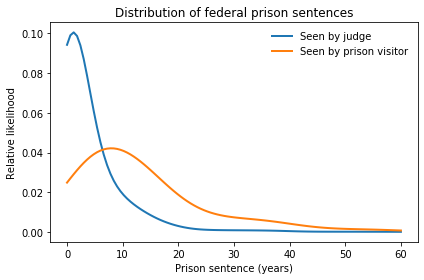

In [37]:
xs = np.linspace(0, 60, 101)
kdeplot(unbiased, xs, 'Seen by judge', bw_method=0.5)
kdeplot(biased, xs, 'Seen by prison visitor', bw_method=0.5)

decorate(xlabel='Prison sentence (years)',
         title='Distribution of federal prison sentences')

plt.savefig('inspection/orange.png', dpi=150)

We can also compute the distribution of sentences as seen by someone at the prison for 13 months.

In [38]:
x = 0.85 * unbiased
y = 13 / 12

weights = x + y

Here's the sample.

In [39]:
kerman = resample_weighted(unbiased, weights)

And here's what it looks like.

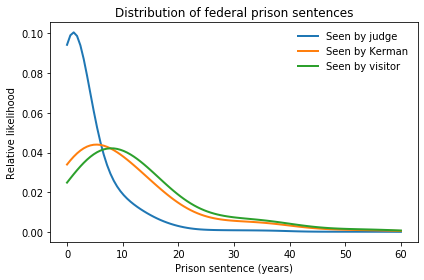

In [40]:
xs = np.linspace(0, 60, 101)
kdeplot(unbiased, xs, 'Seen by judge', bw_method=0.5)
kdeplot(kerman, xs, 'Seen by Kerman', bw_method=0.5)
kdeplot(biased, xs, 'Seen by visitor', bw_method=0.5)

decorate(xlabel='Prison sentence (years)',
         title='Distribution of federal prison sentences')

plt.savefig('inspection/orange.png', dpi=150)

In the unbiased distribution, almost half of prisoners serve less than one year.

In [41]:
np.mean(unbiased<1)

0.4502719290250053

But if we sample the prison population, barely 3% are short timers.

In [42]:
np.mean(biased<1)

0.0313250083553611

Here are the means of the distributions.

In [43]:
np.mean(unbiased)

3.548807227736438

In [44]:
np.mean(biased)

12.773210217759297

In [45]:
np.mean(kerman)

10.284127315489938